## Task->1: Prediction using Supervised ML

### Author : Shehryar Gondal

### Dataset link : http://bit.ly/w-data

### Problem Statement : Prediction of students based on number of study hours

### Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

![image](LinearRegression.png)

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("student_scores - student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe

<bound method NDFrame.describe of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

### Spliting the dataset

In [8]:
#Creating X, y for training and testing set
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [9]:
## train test split 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

### Building Model

In [10]:
from sklearn.linear_model import LinearRegression
##cross validation
from sklearn.model_selection import cross_val_score

In [11]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

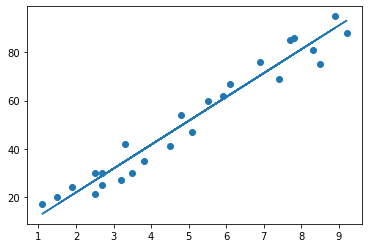

In [12]:
# Plotting the regression line
line = regression.coef_*X+regression.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [13]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [14]:
np.mean(mse)

-39.27427425176029

In [15]:
##prediction 
reg_pred=regression.predict(X_test)

In [16]:
reg_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

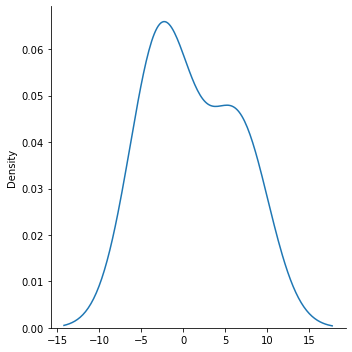

In [17]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [18]:
from sklearn.metrics import r2_score

In [19]:
score=r2_score(reg_pred,y_test)
print(score)

0.9546785947197246


In [20]:
# Comparing Actual vs Predicted
df1= pd.DataFrame({'Actual': y_test, 'Predicted': reg_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
# You can also test with your own data
hours=9.25
own_pred = regression.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, reg_pred)) 

Mean Absolute Error: 4.183859899002982
